# EDA for HSVMR dataset

In [1]:
!nvidia-smi

Thu Dec 15 10:36:15 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P0    27W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Setup Environment

In [2]:
# mount driver
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/CardiacSeg/eda/HSVMR

# install dependents
!pip install -q "monai-weekly[nibabel, tqdm, einops]"
!python -c "import matplotlib" || pip install -q matplotlib
%matplotlib inline

# sync python module
%load_ext autoreload
%autoreload 2

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1jz_DGnICBmKWCr_JL904PDQdIEK0_EQG/CardiacSeg/eda/HSVMR
     |████████████████████████████████| 1.2 MB 35.4 MB/s 
     |████████████████████████████████| 41 kB 456 kB/s 


## Import Library

In [3]:
import sys
# set package path
sys.path.append("/content/drive/MyDrive/CardiacSeg")

from monai.data import CacheDataset, DatasetSummary
from monai.transforms import (
    LabelFilterd,
    MapLabelValued,
    AddChanneld,
    Compose,
    LoadImaged,
    Orientationd,
    RandFlipd,
    CropForegroundd,
    RandCropByPosNegLabeld,
    RandShiftIntensityd,
    ScaleIntensityRanged,
    Spacingd,
    RandRotate90d,
    SqueezeDimd,
    ToTensord
)
from monai.utils import first

import matplotlib.pyplot as plt
import pandas as pd

from data_utils.hsvmr_dataset import get_data_dicts
from data_utils.visualization import show_img_lbl
from data_utils.utils import get_data_info

## Prepare data dicts

In [ ]:
data_dir = '/content/drive/MyDrive/CardiacSeg/dataset/HSVMR/training'

In [ ]:
data_dicts = get_data_dicts(data_dir)

## Show data info

In [ ]:
from monai.transforms.utility.dictionary import SqueezeDimd

base_transforms = Compose(
    [
        LoadImaged(keys=["image", "label"]),
        AddChanneld(keys=["image", "label"]),
        LabelFilterd(keys=["label"], applied_labels=[1]),
        Spacingd(
            keys=["image", "label"],
            pixdim=(0.9, 0.9, 1.0),
            mode=("bilinear", "nearest"),
        ),
        Orientationd(keys=["image", "label"], axcodes="PLI"),
        CropForegroundd(
          keys=['image', 'label'], 
          source_key='label',
          margin=30
        ),
        ScaleIntensityRanged(
            keys=["image"],
            a_min=0.0, 
            a_max=1735.0,
            b_min=0.0, 
            b_max=1.0,
            clip=True,
        ),
        SqueezeDimd(keys=["image", "label"])
    ]
)

pid: training_axial_full_pat0
file_pth: /content/drive/MyDrive/CardiacSeg/dataset/HSVMR/training/training_axial_full_pat0.nii.gz
img shape: [384, 384, 150]
img spacing: [0.885417, 0.885417, 0.889999]
lbl shape: [384, 384, 150]
lbl spacing: [0.885417, 0.885417, 0.889999]
lbl ids: [0. 1. 2.]


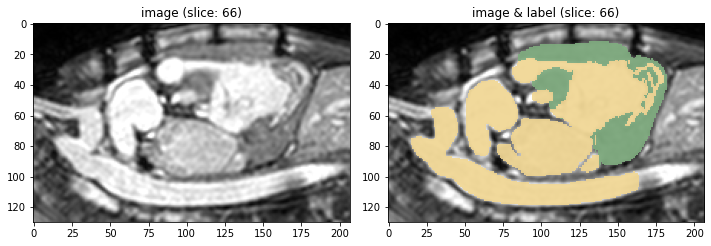


pid: training_axial_full_pat1
file_pth: /content/drive/MyDrive/CardiacSeg/dataset/HSVMR/training/training_axial_full_pat1.nii.gz
img shape: [384, 384, 155]
img spacing: [0.833333, 0.833333, 0.829994]
lbl shape: [384, 384, 155]
lbl spacing: [0.833333, 0.833333, 0.829994]
lbl ids: [0. 1. 2.]


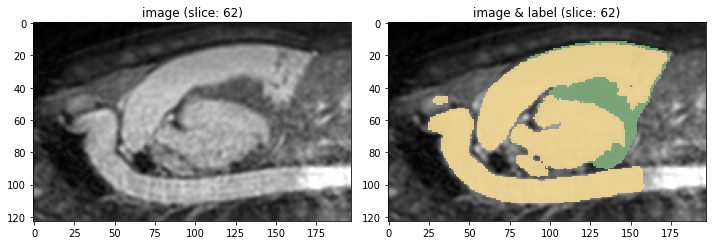


pid: training_axial_full_pat2
file_pth: /content/drive/MyDrive/CardiacSeg/dataset/HSVMR/training/training_axial_full_pat2.nii.gz
img shape: [384, 384, 200]
img spacing: [0.885417, 0.885417, 0.889999]
lbl shape: [384, 384, 200]
lbl spacing: [0.885417, 0.885417, 0.889999]
lbl ids: [0. 1. 2.]


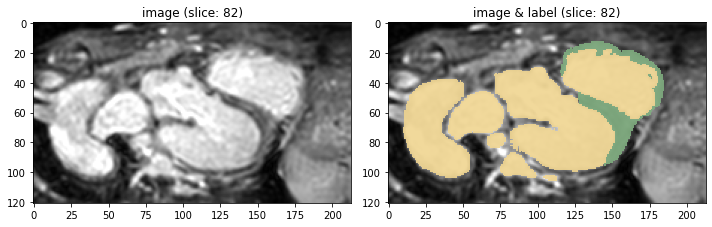


pid: training_axial_full_pat3
file_pth: /content/drive/MyDrive/CardiacSeg/dataset/HSVMR/training/training_axial_full_pat3.nii.gz
img shape: [384, 384, 160]
img spacing: [1.14583, 1.14583, 1.14999]
lbl shape: [384, 384, 160]
lbl spacing: [1.14583, 1.14583, 1.14999]
lbl ids: [0. 1. 2.]


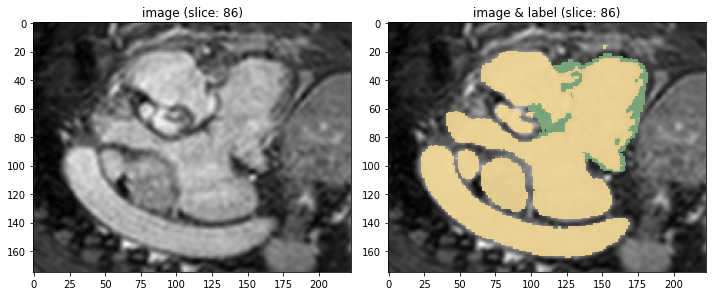


pid: training_axial_full_pat4
file_pth: /content/drive/MyDrive/CardiacSeg/dataset/HSVMR/training/training_axial_full_pat4.nii.gz
img shape: [256, 256, 140]
img spacing: [1.05469, 1.05469, 0.650002]
lbl shape: [256, 256, 140]
lbl spacing: [1.05469, 1.05469, 0.650002]
lbl ids: [0. 1. 2.]


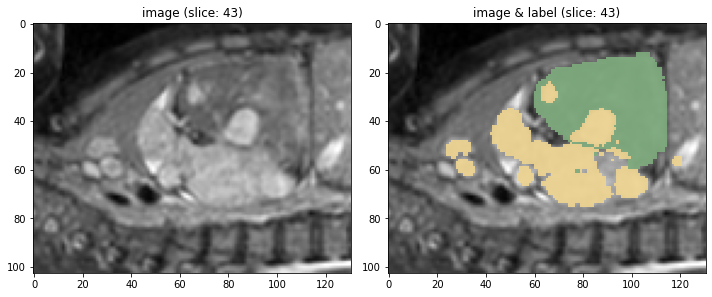


pid: training_axial_full_pat5
file_pth: /content/drive/MyDrive/CardiacSeg/dataset/HSVMR/training/training_axial_full_pat5.nii.gz
img shape: [256, 256, 180]
img spacing: [1.05469, 1.05469, 0.650002]
lbl shape: [256, 256, 180]
lbl spacing: [1.05469, 1.05469, 0.650002]
lbl ids: [0. 1. 2.]


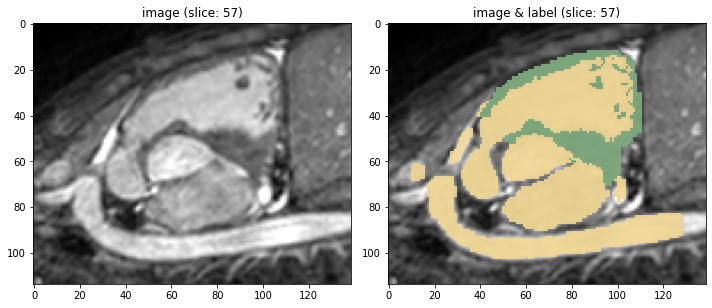


pid: training_axial_full_pat6
file_pth: /content/drive/MyDrive/CardiacSeg/dataset/HSVMR/training/training_axial_full_pat6.nii.gz
img shape: [528, 528, 150]
img spacing: [0.731, 0.731, 0.75]
lbl shape: [528, 528, 150]
lbl spacing: [0.731061, 0.731061, 0.75]
lbl ids: [0. 1. 2.]


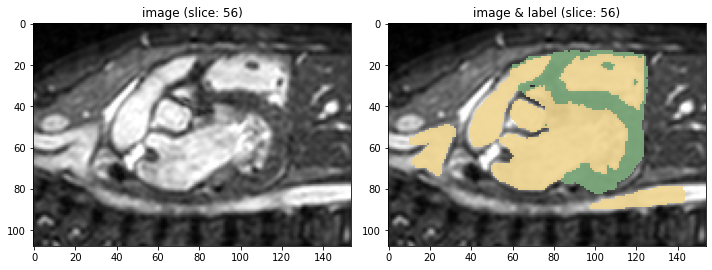


pid: training_axial_full_pat7
file_pth: /content/drive/MyDrive/CardiacSeg/dataset/HSVMR/training/training_axial_full_pat7.nii.gz
img shape: [528, 528, 200]
img spacing: [0.731061, 0.731061, 0.75]
lbl shape: [528, 528, 200]
lbl spacing: [0.731061, 0.731061, 0.75]
lbl ids: [0. 1. 2.]


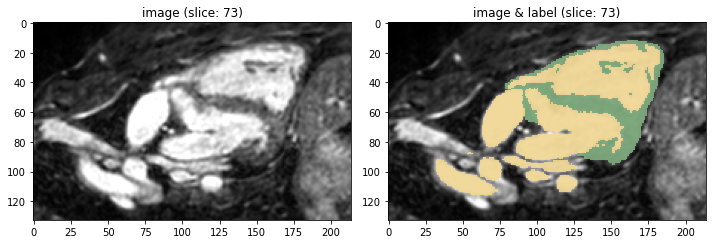


pid: training_axial_full_pat8
file_pth: /content/drive/MyDrive/CardiacSeg/dataset/HSVMR/training/training_axial_full_pat8.nii.gz
img shape: [384, 384, 140]
img spacing: [0.885417, 0.885417, 0.889999]
lbl shape: [384, 384, 140]
lbl spacing: [0.885417, 0.885417, 0.889999]
lbl ids: [0. 1. 2.]


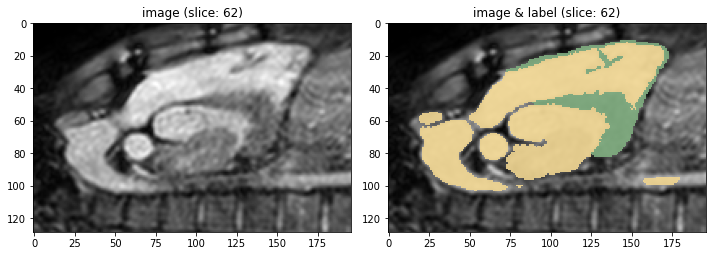


pid: training_axial_full_pat9
file_pth: /content/drive/MyDrive/CardiacSeg/dataset/HSVMR/training/training_axial_full_pat9.nii.gz
img shape: [384, 384, 180]
img spacing: [0.885417, 0.885417, 0.889999]
lbl shape: [384, 384, 180]
lbl spacing: [0.885417, 0.885417, 0.889999]
lbl ids: [0. 1. 2.]


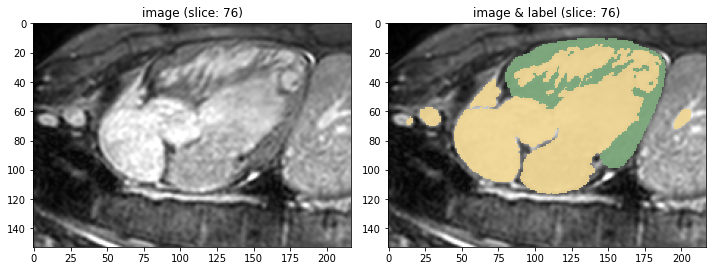

In [ ]:
data_info_df = get_data_info(data_dicts, base_transforms)

In [ ]:
data_info_df

,pid,img_shape,img_space,lbl_shape,lbl_space,lbl_ids
0,training_axial_full_pat0,"[384, 384, 150]","[0.885417, 0.885417, 0.889999]","[384, 384, 150]","[0.885417, 0.885417, 0.889999]","[0.0, 1.0, 2.0]"
1,training_axial_full_pat1,"[384, 384, 155]","[0.833333, 0.833333, 0.829994]","[384, 384, 155]","[0.833333, 0.833333, 0.829994]","[0.0, 1.0, 2.0]"
2,training_axial_full_pat2,"[384, 384, 200]","[0.885417, 0.885417, 0.889999]","[384, 384, 200]","[0.885417, 0.885417, 0.889999]","[0.0, 1.0, 2.0]"
3,training_axial_full_pat3,"[384, 384, 160]","[1.14583, 1.14583, 1.14999]","[384, 384, 160]","[1.14583, 1.14583, 1.14999]","[0.0, 1.0, 2.0]"
4,training_axial_full_pat4,"[256, 256, 140]","[1.05469, 1.05469, 0.650002]","[256, 256, 140]","[1.05469, 1.05469, 0.650002]","[0.0, 1.0, 2.0]"
5,training_axial_full_pat5,"[256, 256, 180]","[1.05469, 1.05469, 0.650002]","[256, 256, 180]","[1.05469, 1.05469, 0.650002]","[0.0, 1.0, 2.0]"
6,training_axial_full_pat6,"[528, 528, 150]","[0.731, 0.731, 0.75]","[528, 528, 150]","[0.731061, 0.731061, 0.75]","[0.0, 1.0, 2.0]"
7,training_axial_full_pat7,"[528, 528, 200]","[0.731061, 0.731061, 0.75]","[528, 528, 200]","[0.731061, 0.731061, 0.75]","[0.0, 1.0, 2.0]"
8,training_axial_full_pat8,"[384, 384, 140]","[0.885417, 0.885417, 0.889999]","[384, 384, 140]","[0.885417, 0.885417, 0.889999]","[0.0, 1.0, 2.0]"
9,training_axial_full_pat9,"[384, 384, 180]","[0.885417, 0.885417, 0.889999]","[384, 384, 180]","[0.885417, 0.885417, 0.889999]","[0.0, 1.0, 2.0]"


In [ ]:
data_shape_df = pd.DataFrame(data_info_df['img_shape'].to_list(), columns=['w', 'h', 's'])
data_shape_df.mean()

w    387.2
h    387.2
s    165.5
dtype: float64

In [ ]:
data_space_df = pd.DataFrame(data_info_df['img_space'].to_list(), columns=['x', 'y', 'z'])
data_space_df.mean()

x    0.909227
y    0.909227
z    0.833998
dtype: float32

## Statcics

In [ ]:
base_tf = Compose([
    LoadImaged(keys=['image', 'label']),
    AddChanneld(keys=['image', 'label'])
])

ds = CacheDataset(
    data=data_dicts,
    transform=base_tf
)

Loading dataset: 100%|██████████| 10/10 [00:23<00:00,  2.39s/it]


In [ ]:
# ref: https://arxiv.org/pdf/1904.08128.pdf
s = DatasetSummary(ds)
s.calculate_percentiles(min_percentile=5, max_percentile=95)
s.calculate_statistics()
data_target_space = s.get_target_spacing()

In [ ]:
print('data target space:')
data_target_space

data target space:


(0.8854169845581055, 0.8854169845581055, 0.859996497631073)

In [ ]:
print('data intensities statcics:')
data_intensities_statcics = pd.DataFrame(
    [[s.data_min, s.data_median, s.data_max, s.data_mean, s.data_std, s.data_min_percentile, s.data_max_percentile]],
    columns=['min', 'med', 'max', 'mean', 'std', 'min_percentile (0.5%)', 'max_percentile (99.5%)']
)
data_intensities_statcics

data intensities statcics:


,min,med,max,mean,std,min_percentile (0.5%),max_percentile (99.5%)
0,3.99536,1142.637329,4478.415527,1129.292969,395.651031,496.718079,1735.087646


## Resample

In [ ]:
ratio_w_s = ((data_shape_df['w'] * data_space_df['x']) / (data_shape_df['s'] * data_space_df['z'])).mean()
ratio_w_s

1.3554126

In [ ]:
re_s_pix_dim = 0.77 #((data_shape_df['s'] * data_space_df['z'])/192).mean()
re_w_pix_dim = ratio_w_s * re_s_pix_dim
print('re_w_pix_dim:', re_w_pix_dim)
print('re_s_pix_dim:', re_s_pix_dim)

re_w_pix_dim: 1.0436677038669586
re_s_pix_dim: 0.77


In [ ]:
print('resample width:')
data_re_w = (data_shape_df['w'] * data_space_df['x']) / re_w_pix_dim
data_re_w

resample width:


0    195.556854
1    193.779068
2    173.334488
3    185.779022
4    168.001129
5    168.001129
6    192.890182
7    151.112122
8    152.889908
dtype: float32

In [ ]:
print('resample slice:')
data_re_s = (data_shape_df['s'] * data_space_df['z']) / re_s_pix_dim
data_re_s

resample slice:


0    197.402603
1    233.116882
2    221.428574
3    204.545456
4    148.701309
5    148.701309
6    209.349365
7    195.324692
8    173.376633
dtype: float32

In [ ]:
(data_re_w / data_re_s)

0    0.990650
1    0.831253
2    0.782801
3    0.908253
4    1.129789
5    1.129789
6    0.921379
7    0.773646
8    0.881837
dtype: float32

## Transform

In [ ]:
from data_utils.chgh_dataset import get_loader
import argparse
parser = argparse.ArgumentParser(description="model segmentation pipeline")
parser = argparse.ArgumentParser(description="model segmentation pipeline")
# mode
parser.add_argument("--test_mode", action="store_true", help="test mode")

# dir and path
parser.add_argument("--data_dir", default="", type=str, help="dataset directory")
parser.add_argument("--model_dir", default="models", type=str, help="directory to save the models")
parser.add_argument("--log_dir", default="logs", type=str, help="directory to save the tensorboard logs")
parser.add_argument("--eval_dir", default="evals", type=str, help="directory to save the eval result")
parser.add_argument("--checkpoint", default=None, help="start training from saved checkpoint")
parser.add_argument("--filename", default="best_model.pth", help="save model file name")

# train loop
parser.add_argument("--start_epoch", default=0, type=int, help="start epoch")
parser.add_argument("--val_every", default=20, type=int, help="validation frequency")
parser.add_argument("--max_epoch", default=2000, type=int, help="max number of training epochs")

# data
parser.add_argument("--fold", default=4, type=int, help="index of fold")
parser.add_argument("--split_train_ratio", default=0.8, type=float, help="split train ratio")
parser.add_argument("--num_fold", default=5, type=float, help="num fold")
parser.add_argument("--num_samples", default=2, type=int, help="number of samples")
parser.add_argument("--batch_size", default=1, type=int, help="number of batch size")
parser.add_argument("--pin_memory", action="store_true", help="pin memory")
parser.add_argument("--workers", default=2, type=int, help="number of workers")

# model
parser.add_argument("--in_channels", default=1, type=int, help="number of input channels")
parser.add_argument("--out_channels", default=2, type=int, help="number of output channels")

# optimizer
parser.add_argument("--optim_lr", default=1e-4, type=float, help="optimization learning rate")
parser.add_argument("--reg_weight", default=1e-5, type=float, help="regularization weight")

# scheduler
parser.add_argument("--lrschedule", default="warmup_cosine", type=str, help="type of learning rate scheduler")
parser.add_argument("--warmup_epochs", default=50, type=int, help="number of warmup epochs")
parser.add_argument("--resume_ckpt", action="store_true", help="resume training from pretrained checkpoint")

# infer
parser.add_argument("--sw_batch_size", default=4, type=int, help="number of sliding window batch size")
parser.add_argument("--infer_overlap", default=0.25, type=float, help="sliding window inference overlap")

# args
args, unknown = parser.parse_known_args()

# setup config
model_name = 'base_cv1'
root_dir = '/content/drive/MyDrive/CardiacSeg/UNETCNX/CHGH'

args.data_dir = '/content/drive/MyDrive/CardiacSeg/dataset/CHGH/dataset'
args.fold = 2
args.split_train_ratio = 0.6
args.num_fold = 3
args.start_epoch = 0
args.val_every = 5
args.max_epoch = 10
args.pin_memory = True
args.test_mode = False
# args.checkpoint = os.path.join(args.model_dir, 'best_model.pth')

In [ ]:
loader = get_loader(args)

/usr/local/lib/python3.7/dist-packages/monai/utils/deprecate_utils.py:110: FutureWarning: <class 'monai.transforms.utility.array.AddChannel'>: Class `AddChannel` has been deprecated since version 0.8. please use MetaTensor data type and monai.transforms.EnsureChannelFirst instead.
  warn_deprecated(obj, msg, warning_category)


fold: 2
train files (4): ['Patient_05', 'Patient_07', 'Patient_08', 'Patient_21']
val files (2): ['Patient_23', 'Patient_24']
test files (3): ['Patient_106', 'Patient_107', 'Patient_108']

load train dataset ...


Loading dataset: 100%|██████████| 4/4 [00:28<00:00,  7.11s/it]



load val dataset ...


Loading dataset: 100%|██████████| 2/2 [00:07<00:00,  3.75s/it]


In [ ]:
tr_data = first(loader[0])

train dataset
img shape: (2, 1, 96, 96, 96)


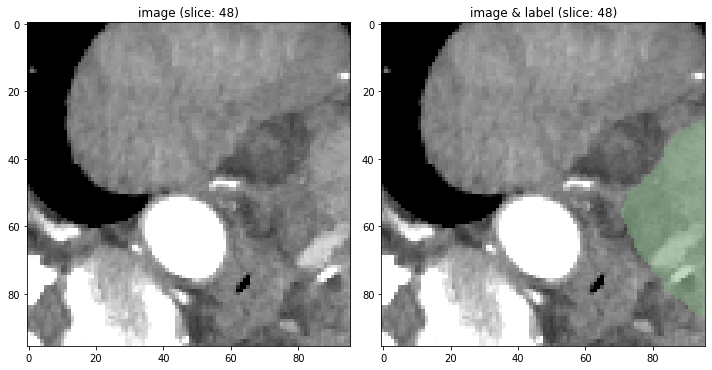

In [ ]:
slice_idx = 48
print('train dataset')
print('img shape:',tr_data['image'].shape)
show_img_lbl(
    tr_data['image'][0,0,:,:,slice_idx],
    tr_data['label'][0,0,:,:,slice_idx],
    slice_idx=slice_idx,
    num_classes=2,
    axis_off=False,
    fig_size=(10,5),
    alpha=0.5
)

In [ ]:
tt_data = first(loader[1])

test dataset
img shape: (1, 1, 190, 190, 149)


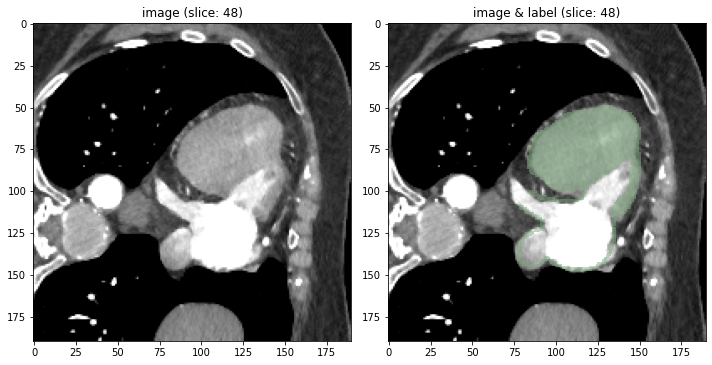

In [ ]:
slice_idx = 48
print('test dataset')
print('img shape:',tt_data['image'].shape)
show_img_lbl(
    tt_data['image'][0,0,:,:,slice_idx],
    tt_data['label'][0,0,:,:,slice_idx],
    slice_idx=slice_idx,
    num_classes=2,
    axis_off=False,
    fig_size=(10,5),
    alpha=0.5
)